#Alzheimer MRI Scans Classifier using CNN

**94.76% Accuracy in classifying MRI scans into - Mild_Demented, Moderate_Demented, Non_Demented or Very_Mild_Demented**

##Importing Data

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import os
import cv2

In [ ]:
Train_Dir = '/content/train-00000-of-00001-c08a401c53fe5312.parquet'
Test_Dir = '/content/test-00000-of-00001-44110b9df98c5585.parquet'

In [ ]:
Train_Df = pd.read_parquet(Train_Dir)
Test_Df = pd.read_parquet(Test_Dir)


In [ ]:
def dict_to_image(image_dict):
    if isinstance(image_dict, dict) and 'bytes' in image_dict:
        byte_string = image_dict['bytes']
        nparr = np.frombuffer(byte_string, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        return img
    else:
        raise TypeError(f"Expected dictionary with 'bytes' key, got {type(image_dict)}")


In [ ]:
Train_Df['image'] = Train_Df['image'].apply(dict_to_image)
Test_Df['image'] = Test_Df['image'].apply(dict_to_image)
print(Train_Df,Test_Df)

                                                  image  label
0     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      2
1     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
2     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
3     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
4     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      2
...                                                 ...    ...
5115  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5116  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5117  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5118  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
5119  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      2

[5120 rows x 2 columns]                                                   image  label
0     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
1     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
2     [[[0, 0, 0], [0, 0, 0], 

In [ ]:
unique_labels = Train_Df['label'].unique()
print(unique_labels)
num_classes = len(unique_labels)
num_classes

[2 0 3 1]


4

##Plotting sample image

In [ ]:
import matplotlib.pyplot as plt

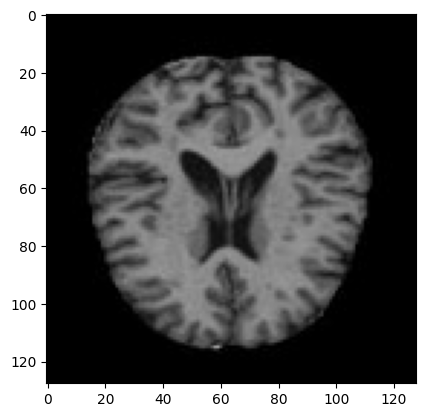

In [ ]:
images = Train_Df['image']
for img in images:
    plt.imshow(img)
    plt.show()
    break

##Reshaping and One Hot encoding Labels for Categorical Cross Entropy

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
X_train_indivisual = Train_Df['image']
y_train = Train_Df['label']

In [ ]:
X_test_indivisual = Test_Df['image']
y_test = Test_Df['label']

In [ ]:
def resahpe_X_y(X, y):
    X_array = []
    for x in X:
        X_array.append(x)

    y = to_categorical(y)

    X_array = np.array(X_array)
    X_array = X_array / 255.0
    y = np.array(y)
    print(X_array.shape, y.shape)
    return X_array, y
X_train, y_train = resahpe_X_y(X_train_indivisual, y_train)
X_test, y_test = resahpe_X_y(X_test_indivisual, y_test)

(5120, 128, 128, 3) (5120, 4)
(1280, 128, 128, 3) (1280, 4)


##Defining Model Architecture And Training Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [ ]:
Model = Sequential()


In [ ]:
Model.add(Conv2D(32, (3,3),padding = 'same', input_shape = X_train.shape[1:]))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(64, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

Model.add(Flatten())

Model.add(Dense(num_classes))
Model.add(Activation('softmax'))

Model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

History = Model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - categorical_accuracy: 0.4721 - loss: 1.1990 - val_categorical_accuracy: 0.5840 - val_loss: 0.9140
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.6043 - loss: 0.8788 - val_categorical_accuracy: 0.6406 - val_loss: 0.7701
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - categorical_accuracy: 0.7080 - loss: 0.6715 - val_categorical_accuracy: 0.7168 - val_loss: 0.6419
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.8059 - loss: 0.4757 - val_categorical_accuracy: 0.8252 - val_loss: 0.4438
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - categorical_accuracy: 0.8892 - loss: 0.3162 - val_categorical_accuracy: 0.8994 - val_loss: 0.2811
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.9193 - loss: 0.2136 - val_categorical_accuracy: 0.9189 - val_loss: 0.2298
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.95

##Plotting Accuracy and Loss Grpahs

In [ ]:
acc = History.history['categorical_accuracy']
loss = History.history['loss']

In [ ]:
val_acc = History.history['val_categorical_accuracy']
val_loss = History.history['val_loss']

In [ ]:
epochs =  range(1, len(acc) + 1)

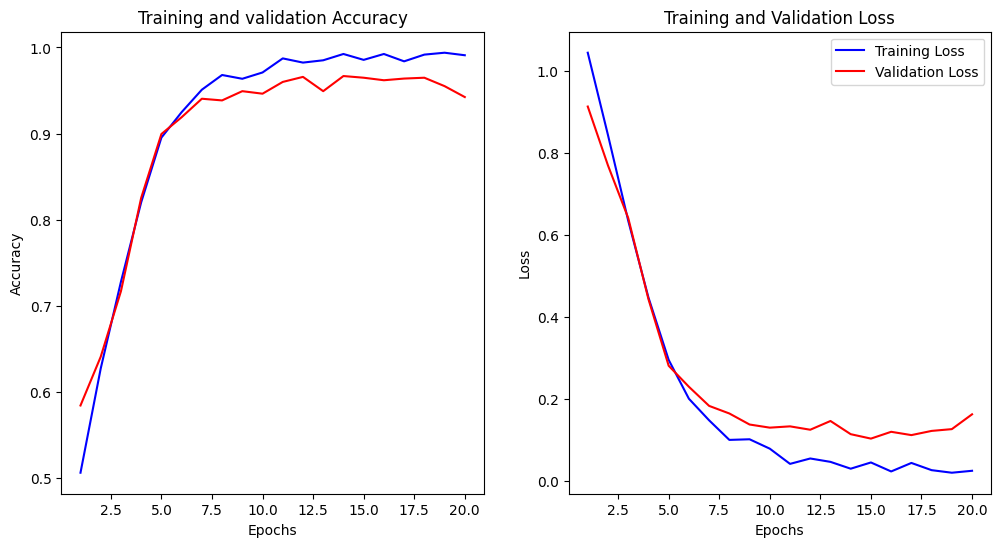

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Calculating Accuracy on Test Set

In [ ]:
y_pred = Model.predict(X_test)
y_predicted = []

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
for y in y_pred:
    y_predicted.append(np.argmax(y))

In [ ]:
y_true = []
for y in y_test:
    y_true.append(np.argmax(y))

In [ ]:
Correct_pred_count = 0
for true,pred in zip(y_true,y_predicted):
    if true == pred:
        Correct_pred_count += 1
Accuracy = Correct_pred_count / len(y_pred) * 100
print("Accuracy on Testing Set (Unseen Data): ", Accuracy)

Accuracy on Testing Set (Unseen Data):  94.765625
